# Labelling Test

In [1]:
import pandas as pd

df = pd.read_csv('../data/preprocessed/review_tiktok_dataset_preprocessed.csv')
df.head()

,at,reviewId,userName,score,content,cleaning,case_folding,no_elongation,formalization,tokenized,stopword_removal,stemming
0,2025-07-01 18:59:48,d6b3a4be-536b-4c5b-a4a9-46056c133e10,Pengguna Google,1,saya sudah berkali² stuck saat mau masuk tikto...,saya sudah berkali stuck saat mau masuk tiktok...,saya sudah berkali stuck saat mau masuk tiktok...,saya sudah berkali stuck saat mau masuk tiktok...,saya sudah berkali stuck saat mau masuk tiktok...,"['saya', 'sudah', 'berkali', 'stuck', 'saat', ...","['berkali', 'stuck', 'mau', 'masuk', 'tiktok',...","['kali', 'stuck', 'mau', 'masuk', 'tiktok', 's..."
1,2025-07-01 06:19:18,fe657a00-c516-475b-ac8f-69a8f9c7d6d8,Pengguna Google,3,apk ini jujur bagus sih... cuman gmn ya? aku s...,apk ini jujur bagus sih cuman gmn ya aku serin...,apk ini jujur bagus sih cuman gmn ya aku serin...,apk ini jujur bagus sih cuman gmn ya aku serin...,apk ini jujur bagus sih cuman bagaimana ya aku...,"['apk', 'ini', 'jujur', 'bagus', 'sih', 'cuman...","['apk', 'jujur', 'bagus', 'sih', 'cuman', 'bag...","['apk', 'jujur', 'bagus', 'sih', 'cuman', 'bag..."
2,2025-06-30 08:16:34,5b1112d4-1947-4005-9cec-6ca3becf1e01,Pengguna Google,1,"tolong dong d perbaiki,setiap Saya buka tiktok...",tolong dong d perbaikisetiap Saya buka tiktok ...,tolong dong d perbaikisetiap saya buka tiktok ...,tolong dong d perbaikisetiap saya buka tiktok ...,tolong dong di perbaikisetiap saya buka tiktok...,"['tolong', 'dong', 'di', 'perbaikisetiap', 'sa...","['dong', 'perbaikisetiap', 'buka', 'tiktok', '...","['dong', 'perbaikisetiap', 'buka', 'tiktok', '..."
3,2025-07-01 07:21:18,10b4e614-70ba-4d26-af54-391beb7754ce,Pengguna Google,4,apk ini memang bgus cuma benerin dong sedikit ...,apk ini memang bgus cuma benerin dong sedikit ...,apk ini memang bgus cuma benerin dong sedikit ...,apk ini memang bgus cuma benerin dong sedikit ...,apk ini memang bagus cuma benerin dong sedikit...,"['apk', 'ini', 'memang', 'bagus', 'cuma', 'ben...","['apk', 'memang', 'bagus', 'cuma', 'benerin', ...","['apk', 'memang', 'bagus', 'cuma', 'benerin', ..."
4,2025-07-01 20:12:54,384feee2-91b6-4a7d-bba1-d967f8d2ca1e,Pengguna Google,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,kalau aku ngeser ke atas pasti itu lagu jadi l...,kalau aku ngeser ke atas pasti itu lagu jadi l...,kalau aku ngeser ke atas pasti itu lagu jadi l...,kalau aku ngeser ke atas pasti itu lagu jadi l...,"['kalau', 'aku', 'ngeser', 'ke', 'atas', 'past...","['kalau', 'aku', 'ngeser', 'atas', 'lagu', 'ja...","['kalau', 'aku', 'ngeser', 'atas', 'lagu', 'ja..."


In [13]:
df = df.head(20)

In [14]:
df_vader = df[['at', 'score', 'content']]

## Test VADER

In [ ]:
from googletrans import Translator


translator = Translator()

def translate_comment(comment):
    try:
        translated = translator.translate(comment, src='id', dest='en')
        return translated.text
    except Exception as e:
        print(f"Error translating comment: {comment}. Error: {e}")
        return comment

df_vader.loc[:, 'translated_content'] = df_vader['content'].apply(translate_comment)

C:\Users\krisn\AppData\Local\Temp\ipykernel_7844\495928019.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader.loc[:, 'translated_content'] = df_vader['content'].apply(translate_comment)


In [16]:
df_vader.head()

,at,score,content,translated_content
0,2025-07-01 18:59:48,1,saya sudah berkali² stuck saat mau masuk tikto...,I have been stuck many times when I want to en...
1,2025-07-01 06:19:18,3,apk ini jujur bagus sih... cuman gmn ya? aku s...,"This is honest, it's good ... just?I often exp..."
2,2025-06-30 08:16:34,1,"tolong dong d perbaiki,setiap Saya buka tiktok...","Please fix it, every time I open Tiktok Setuck..."
3,2025-07-01 07:21:18,4,apk ini memang bgus cuma benerin dong sedikit ...,"This APK is really good, just a little bit by ..."
4,2025-07-01 20:12:54,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,"If I shift up, it will definitely be a song so..."


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(comment):
    try:
        score = analyzer.polarity_scores(comment)
        return score['compound']
    except Exception as e:
        print(f"Error analyzing sentiment for comment: {comment}. Error: {e}")
        return 0.0

df_vader['sentiment_score'] = df_vader['translated_content'].apply(get_sentiment_score)


C:\Users\krisn\AppData\Local\Temp\ipykernel_7844\1844777534.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['sentiment_score'] = df_vader['translated_content'].apply(get_sentiment_score)


In [18]:
df_vader

,at,score,content,translated_content,sentiment_score
0,2025-07-01 18:59:48,1,saya sudah berkali² stuck saat mau masuk tikto...,I have been stuck many times when I want to en...,-0.4742
1,2025-07-01 06:19:18,3,apk ini jujur bagus sih... cuman gmn ya? aku s...,"This is honest, it's good ... just?I often exp...",0.8834
2,2025-06-30 08:16:34,1,"tolong dong d perbaiki,setiap Saya buka tiktok...","Please fix it, every time I open Tiktok Setuck...",-0.0772
3,2025-07-01 07:21:18,4,apk ini memang bgus cuma benerin dong sedikit ...,"This APK is really good, just a little bit by ...",0.6724
4,2025-07-01 20:12:54,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,"If I shift up, it will definitely be a song so...",0.9103
5,2025-07-01 13:33:16,1,kadang apk ini setiap kali dibuka loading lama...,Sometimes this APK is opened for a long time f...,-0.0129
6,2025-06-20 18:44:29,1,video draf saya kadang voice over nya suka hil...,My draft video sometimes the voice over likes ...,-0.8357
7,2025-06-28 02:11:04,1,"Tiktok makin di update makin jelek, aku udh un...","Tiktok is increasingly updated worse, I have u...",-0.3058
8,2025-06-20 02:38:29,3,"aplikasi tik tok ini sangat berguna sekali, ki...","This Tik Tok application is very useful, we ca...",0.6947
9,2025-06-27 14:59:36,1,saya kecewa 3 hari belakangan ini sering berma...,I am disappointed in the past 3 days often hav...,-0.8168


In [19]:
def sentiment_label(sentiment_score):
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
df_vader['sentiment_label'] = df_vader['sentiment_score'].apply(sentiment_label)
   

C:\Users\krisn\AppData\Local\Temp\ipykernel_7844\3754525953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['sentiment_label'] = df_vader['sentiment_score'].apply(sentiment_label)


In [20]:
df_vader

,at,score,content,translated_content,sentiment_score,sentiment_label
0,2025-07-01 18:59:48,1,saya sudah berkali² stuck saat mau masuk tikto...,I have been stuck many times when I want to en...,-0.4742,negative
1,2025-07-01 06:19:18,3,apk ini jujur bagus sih... cuman gmn ya? aku s...,"This is honest, it's good ... just?I often exp...",0.8834,positive
2,2025-06-30 08:16:34,1,"tolong dong d perbaiki,setiap Saya buka tiktok...","Please fix it, every time I open Tiktok Setuck...",-0.0772,negative
3,2025-07-01 07:21:18,4,apk ini memang bgus cuma benerin dong sedikit ...,"This APK is really good, just a little bit by ...",0.6724,positive
4,2025-07-01 20:12:54,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,"If I shift up, it will definitely be a song so...",0.9103,positive
5,2025-07-01 13:33:16,1,kadang apk ini setiap kali dibuka loading lama...,Sometimes this APK is opened for a long time f...,-0.0129,neutral
6,2025-06-20 18:44:29,1,video draf saya kadang voice over nya suka hil...,My draft video sometimes the voice over likes ...,-0.8357,negative
7,2025-06-28 02:11:04,1,"Tiktok makin di update makin jelek, aku udh un...","Tiktok is increasingly updated worse, I have u...",-0.3058,negative
8,2025-06-20 02:38:29,3,"aplikasi tik tok ini sangat berguna sekali, ki...","This Tik Tok application is very useful, we ca...",0.6947,positive
9,2025-06-27 14:59:36,1,saya kecewa 3 hari belakangan ini sering berma...,I am disappointed in the past 3 days often hav...,-0.8168,negative


Text(0.5, 1.0, 'Sentiment Distribution')

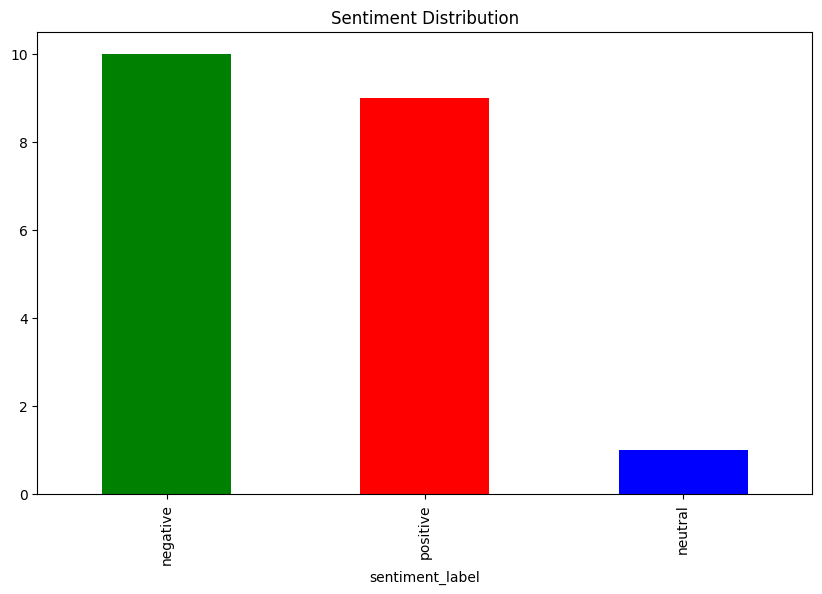

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
df_vader['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')

## Test ww11o

In [10]:
df_indoNLU = df[['at', 'score', 'formalization']].head(1000).copy()
df_indoNLU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   at             1000 non-null   object
 1   score          1000 non-null   int64 
 2   formalization  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
from transformers import pipeline

model_id = "w11wo/indonesian-roberta-base-sentiment-classifier"
classifier = pipeline("sentiment-analysis", model=model_id, tokenizer=model_id)

Device set to use cpu


In [12]:
from tqdm import tqdm
tqdm.pandas()

df_indoNLU['sentiment_label'] = df_indoNLU['formalization'].progress_apply(lambda x: classifier(x)[0]['label'])
df_indoNLU['sentiment_score'] = df_indoNLU['formalization'].progress_apply(lambda x: classifier(x)[0]['score'])


100%|██████████| 1000/1000 [01:10<00:00, 14.19it/s]


In [13]:
df_indoNLU

,at,score,formalization,sentiment_label,sentiment_score
0,2025-07-01 18:59:48,1,saya sudah berkali stuck saat mau masuk tiktok...,negative,0.999132
1,2025-07-01 06:19:18,3,apk ini jujur bagus sih cuman bagaimana ya aku...,negative,0.999085
2,2025-06-30 08:16:34,1,tolong dong di perbaikisetiap saya buka tiktok...,negative,0.998898
3,2025-07-01 07:21:18,4,apk ini memang bagus cuma benerin dong sedikit...,negative,0.999422
4,2025-07-01 20:12:54,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,negative,0.997509
...,...,...,...,...,...
995,2025-06-24 15:08:54,1,bug ya tolong di benerin dong masa kalau habis...,negative,0.999063
996,2025-06-27 17:58:12,3,kenapa aplikasi ya tidak bisa dibuka sih min p...,negative,0.974777
997,2025-06-11 20:46:14,1,bug parahgabisa login padahal penyimpanan msi ...,negative,0.997509
998,2025-06-24 12:18:12,4,plis tik tok mengadakan untuk menghapus video ...,neutral,0.954031


In [14]:
df_indoNLU.to_csv('../data/preprocessed/review_tiktok_dataset_sentiment_indoNLU-2.csv', index=False)

## Indoberttweet


In [20]:
df_indo_indobert = df[['at', 'score', 'formalization']].head(1000).copy()
df_indo_indobert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   at             1000 non-null   object
 1   score          1000 non-null   int64 
 2   formalization  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [25]:
from transformers import pipeline
from tqdm import tqdm
import pandas as pd

tqdm.pandas()

# Load model IndoBERTweet sentiment
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
)

def get_sentiment_info(text):
    if isinstance(text, str) and text.strip():
        result = sentiment_pipeline(text)[0]
        return result['label'], result['score']  # ← diperbaiki di sini
    return 'neutral', 0.0

# Proses DataFrame
df_indo_indobert[['sentimen', 'score_sentiment']] = df_indo_indobert['formalization'].progress_apply(
    lambda x: pd.Series(get_sentiment_info(x))
)


Device set to use cuda:0
100%|██████████| 1000/1000 [00:09<00:00, 103.13it/s]


In [26]:
df_indo_indobert.head()

,at,score,formalization,sentimen,score_sentiment
0,2025-07-01 18:59:48,1,saya sudah berkali stuck saat mau masuk tiktok...,Negative,0.996135
1,2025-07-01 06:19:18,3,apk ini jujur bagus sih cuman bagaimana ya aku...,Negative,0.994506
2,2025-06-30 08:16:34,1,tolong dong di perbaikisetiap saya buka tiktok...,Negative,0.985778
3,2025-07-01 07:21:18,4,apk ini memang bagus cuma benerin dong sedikit...,Negative,0.994080
4,2025-07-01 20:12:54,1,kalau aku ngeser ke atas pasti itu lagu jadi l...,Negative,0.987154


In [27]:
df_indo_indobert.to_csv('../data/preprocessed/review_tiktok_dataset_sentiment_indobert.csv', index=False)